In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
palette = "Dark2"
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from modeleval import BinaryEvaluator

In [2]:
# данные
X_train = pd.read_csv("data/from_kedro/train_x.csv")
y_train = pd.read_csv("data/from_kedro/train_y.csv", sep=';').dropna()['net_rate_bin']
X_test = pd.read_csv("data/from_kedro/test_x.csv")
y_test = pd.read_csv("data/from_kedro/test_y.csv", sep=';').dropna()['net_rate_bin']

In [25]:
#np.save('bike_y_train.npy', y_train)
#np.save('bike_y_test_lil.npy', np.atleast_2d(y_test.head(1000).values).T)

In [3]:
# простая модель
rf = RandomForestClassifier(random_state=28)
rf.fit(X_train.head(1000), y_train.head(1000))

RandomForestClassifier(random_state=28)

In [27]:
#np.save('bike_y_pred_lil.npy', np.atleast_2d(rf.predict_proba(X_test.head(1000))[:, 1]).T)

In [4]:
# загрузим оценщик
eva = BinaryEvaluator()

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8646
The recall for 1 is 0.0166
The precision for 1 is 0.3113
The recall for 0 is 0.9944
The precision for 0 is 0.8686
The F1-score is 0.0316
The ROC-AUC is 0.7153

---Confusion Matrix---
Predicted      0    1    All
True                        
0.0        79224  580  79804
1.0        12096   80  12176
All        91320  660  91980


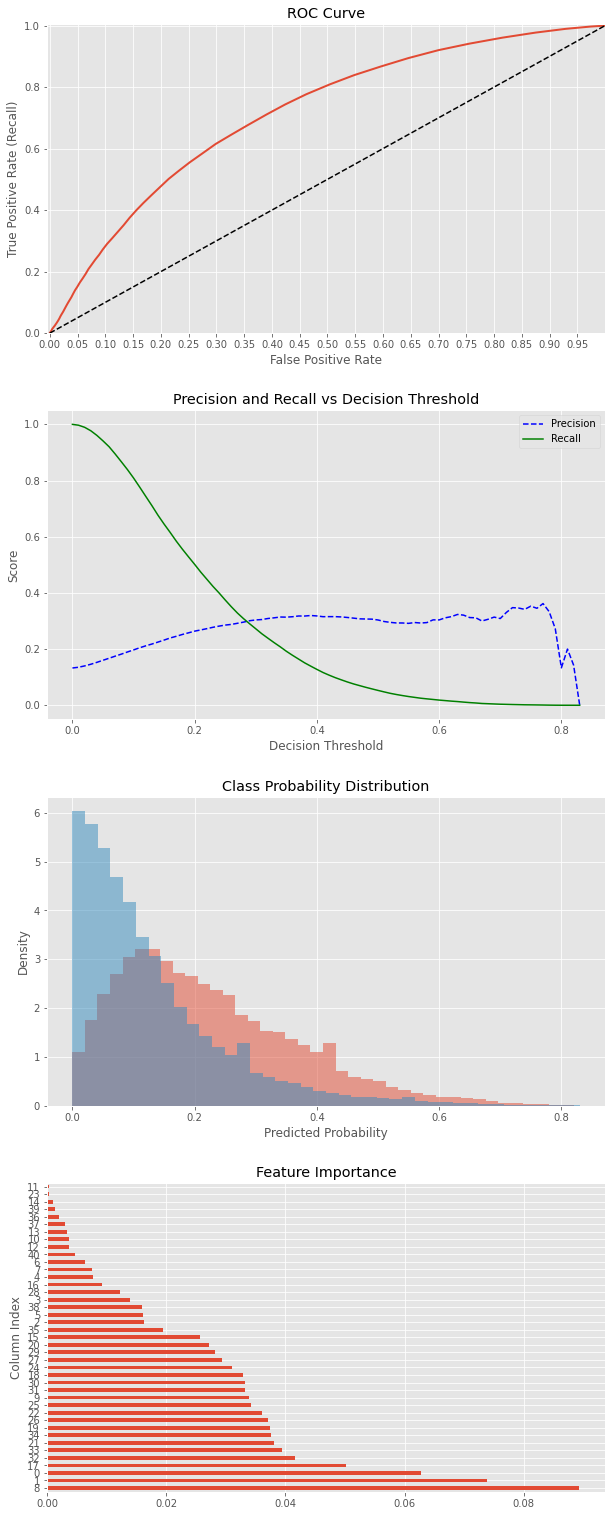

In [12]:
# сделаем оценку модели
eva.evaluate(rf, X_test, y_test, threshold=0.6)

In [7]:
# установим порог и сделаем таблицу
eva.ThresGridSearch(rf, X_test, y_test, thres_list=[0.1,0.3,0.5,0.7],
                    objective=["accuracy"])

,Threshold,accuracy,recall_1,precision_1,recall_0,precision_0,f1,roc_auc
0,0.1,0.569852,0.776740,0.204672,0.538198,0.940319,0.323976,0.71531
1,0.3,0.824212,0.254394,0.305205,0.911394,0.888756,0.277492,0.71531
2,0.5,0.858752,0.047601,0.298178,0.982858,0.870884,0.082097,0.71531
3,0.7,0.866862,0.003236,0.330544,0.998997,0.867560,0.006410,0.71531


In [8]:
# ещё модель
from sklearn.linear_model import LogisticRegression

In [9]:
logi = LogisticRegression(random_state=28)
logi.fit(X_train.head(1000), y_train.head(1000))

LogisticRegression(random_state=28)

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8688
The recall for 1 is 0.0177
The precision for 1 is 0.7372
The recall for 0 is 0.9990
The precision for 0 is 0.8692
The F1-score is 0.0346
The ROC-AUC is 0.7030

---Confusion Matrix---
Predicted      0    1    All
True                        
0.0        79536  268  79804
1.0        12142   34  12176
All        91678  302  91980


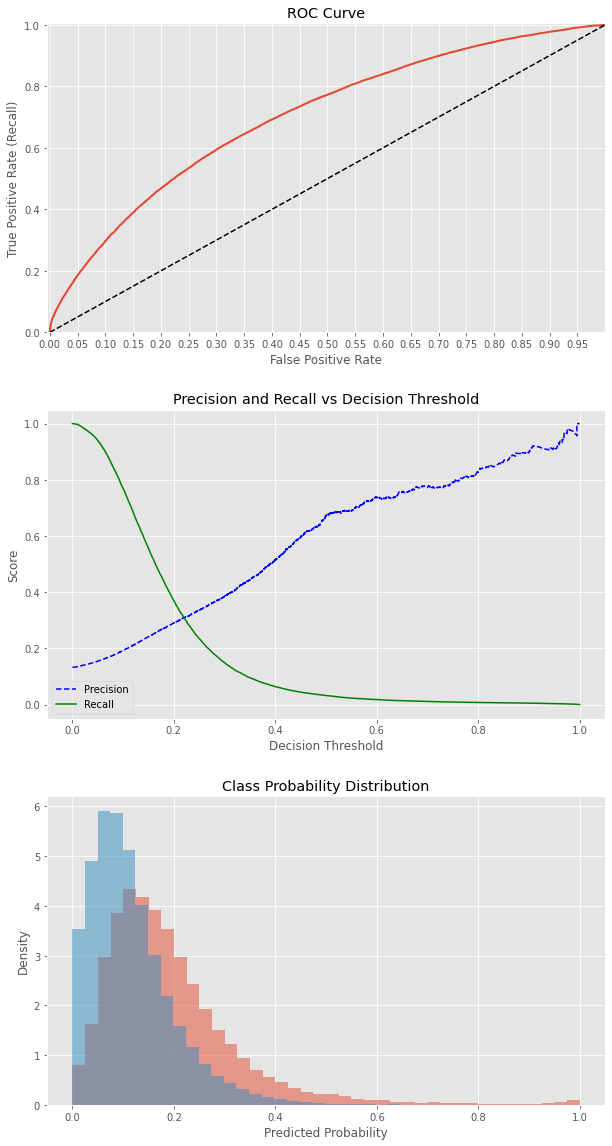

In [10]:
eva.evaluate(logi, X_test, y_test, threshold=0.6)

In [11]:
# сравним и получим лучшую модель
best_model_acc = eva.find_best_model([rf, logi], X_test, y_test, objective="accuracy", threshold=0.6)

The model with maximum accuracy (0.8688138725809958) is the 2 th model


# PSI

Индекс стабильности популяции интерпретируется следующим образом:

- PSI менее 10% показывает отсутствие значимого изменения в текущей выборке;
- PSI в диапазоне от 10 до 25% свидетельствует о незначительном изменении, которые необходимо исследовать;
- PSI более 25% говорит о значительном смещении популяции и требуется перестроение модели.

![](data/pcipng.png)

![](data/pcitab.png)


In [13]:
from modeleval import pci

In [14]:
pci.dataset_validation(X_train, X_test)

,column name,baseline mean (std dev),new mean (std dev),stability index,conclusion
0,Hour_cosine,0.04 (0.72),0.05 (0.72),0.0,Very slight change
1,Hour_sine,-0.0 (0.69),0.0 (0.69),0.0,Very slight change
2,Day_of_week_cosine,0.15 (0.74),0.14 (0.74),0.0,Very slight change
3,Day_of_week_sine,-0.0 (0.65),0.0 (0.65),0.0,Very slight change
4,Is_weekday,0.71 (0.45),0.72 (0.45),0.0,Very slight change
5,Is_night,0.33 (0.47),0.34 (0.47),0.0,Very slight change
6,Season_cosine,0.24 (0.75),0.25 (0.75),0.0,Very slight change
7,Season_sine,-0.0 (0.62),0.0 (0.61),0.0,Very slight change
8,net_rate_previous_hour,0.0 (1.65),-0.01 (1.64),0.0,Very slight change
9,Dock_Count,17.66 (3.98),17.65 (3.98),0.0,Very slight change


In [15]:
pci.dataset_validation(X_train, X_test * 0.1)

,column name,baseline mean (std dev),new mean (std dev),stability index,conclusion
0,Hour_cosine,0.04 (0.72),0.0 (0.07),6.76,Significant change
1,Hour_sine,-0.0 (0.69),0.0 (0.07),7.41,Significant change
2,Day_of_week_cosine,0.15 (0.74),0.01 (0.07),16.38,Significant change
3,Day_of_week_sine,-0.0 (0.65),0.0 (0.07),3.80,Significant change
4,Is_weekday,0.71 (0.45),0.07 (0.05),12.70,Significant change
5,Is_night,0.33 (0.47),0.03 (0.05),5.42,Significant change
6,Season_cosine,0.24 (0.75),0.02 (0.07),17.03,Significant change
7,Season_sine,-0.0 (0.62),0.0 (0.06),6.03,Significant change
8,net_rate_previous_hour,0.0 (1.65),-0.0 (0.16),0.17,Some minor change
9,Dock_Count,17.66 (3.98),1.77 (0.4),7.85,Significant change


Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8688
The recall for 1 is 0.0177
The precision for 1 is 0.7372
The recall for 0 is 0.9990
The precision for 0 is 0.8692
The F1-score is 0.0346
The ROC-AUC is 0.7030

---Confusion Matrix---
Predicted      0    1    All
True                        
0.0        79536  268  79804
1.0        12142   34  12176
All        91678  302  91980


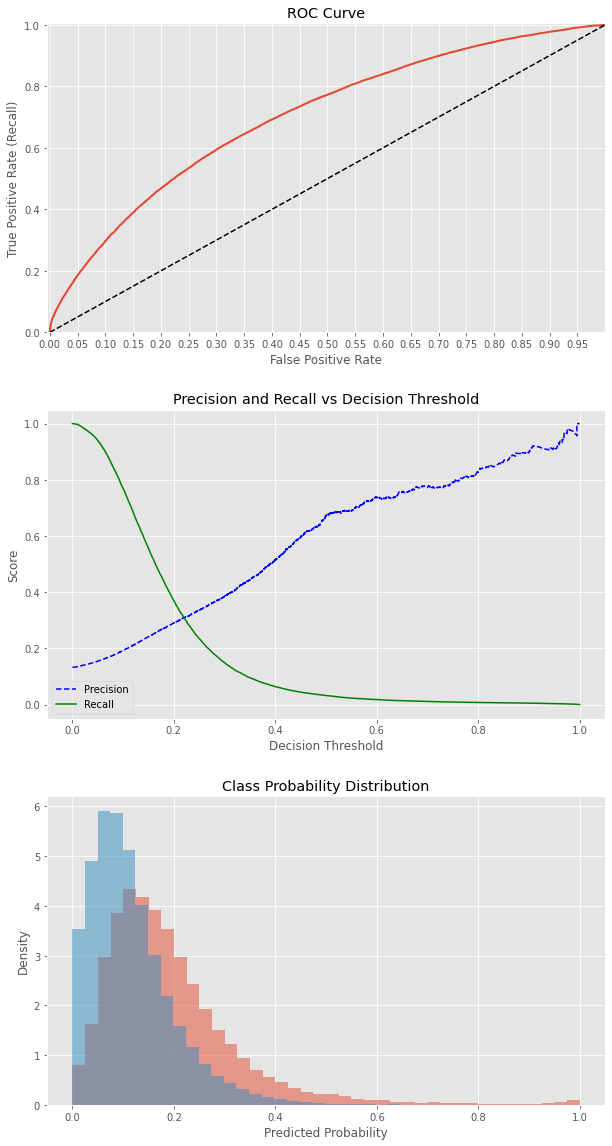

In [16]:
logi = LogisticRegression(random_state=28)
logi.fit(X_train.head(1000), y_train.head(1000))
eva.evaluate(logi, X_test, y_test, threshold=0.6)

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8675
The recall for 1 is 0.0016
The precision for 1 is 0.9750
The recall for 0 is 1.0000
The precision for 0 is 0.8675
The F1-score is 0.0032
The ROC-AUC is 0.7030

---Confusion Matrix---
Predicted      0   1    All
True                       
0.0        79784  20  79804
1.0        12173   3  12176
All        91957  23  91980


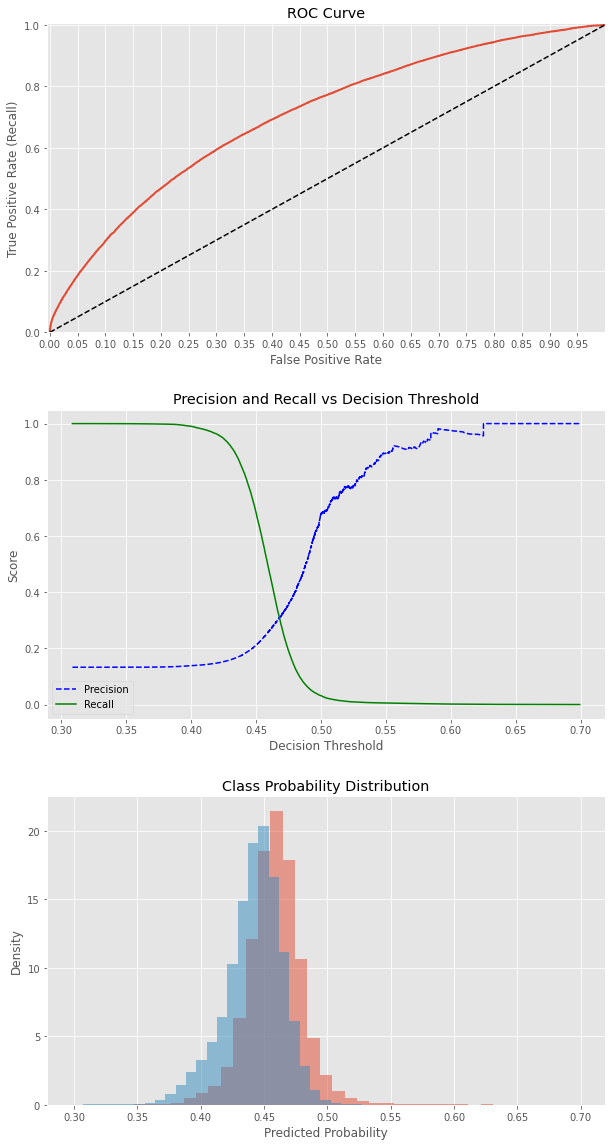

In [17]:
eva.evaluate(logi, X_test*0.1, y_test, threshold=0.6)

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8684
The recall for 1 is 0.0115
The precision for 1 is 0.7784
The recall for 0 is 0.9995
The precision for 0 is 0.8686
The F1-score is 0.0227
The ROC-AUC is 0.7030

---Confusion Matrix---
Predicted      0    1    All
True                        
0.0        79625  179  79804
1.0        12158   18  12176
All        91783  197  91980


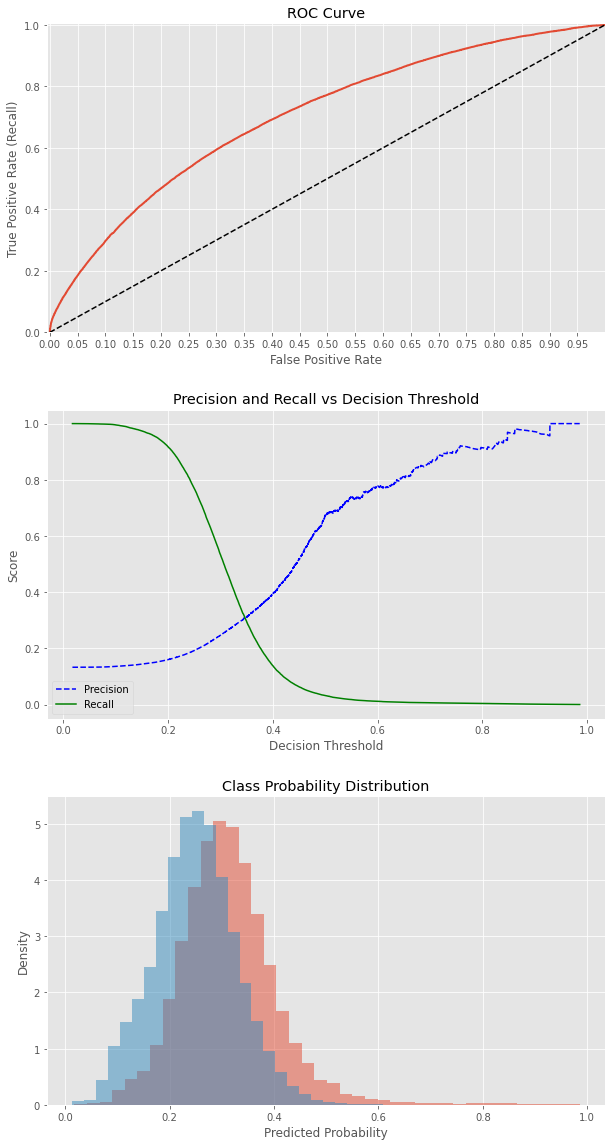

In [18]:
eva.evaluate(logi, X_test*0.5, y_test, threshold=0.6)